# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

This Jupyter notebook was AI-generated and has not been fully verified. Users should exercise caution when interpreting the code or results.

## Overview
This notebook provides an exploration of the Dandiset 001361, which includes two-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The dataset is accessible at [Dandiset 001361](https://dandiarchive.org/dandiset/001361).

## Summary
In this notebook, we will:
- Load data from a selected NWB file in the Dandiset
- Visualize behavioral data such as position and speed
- Provide code snippets and explanations to guide further analysis

## Required Packages
The following packages are required to run the notebook:
- PyNWB
- h5py
- remfile
- matplotlib
- seaborn

These packages are assumed to be already installed.

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dandiset using DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045
Found 152 assets in the dataset

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb


## Load Data from NWB File

In [3]:
# Load NWB file
url = "https://api.dandiarchive.org/api/assets/a22cc1da-b5e8-4fea-a770-7b83a6e79656/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Visualize Position Data

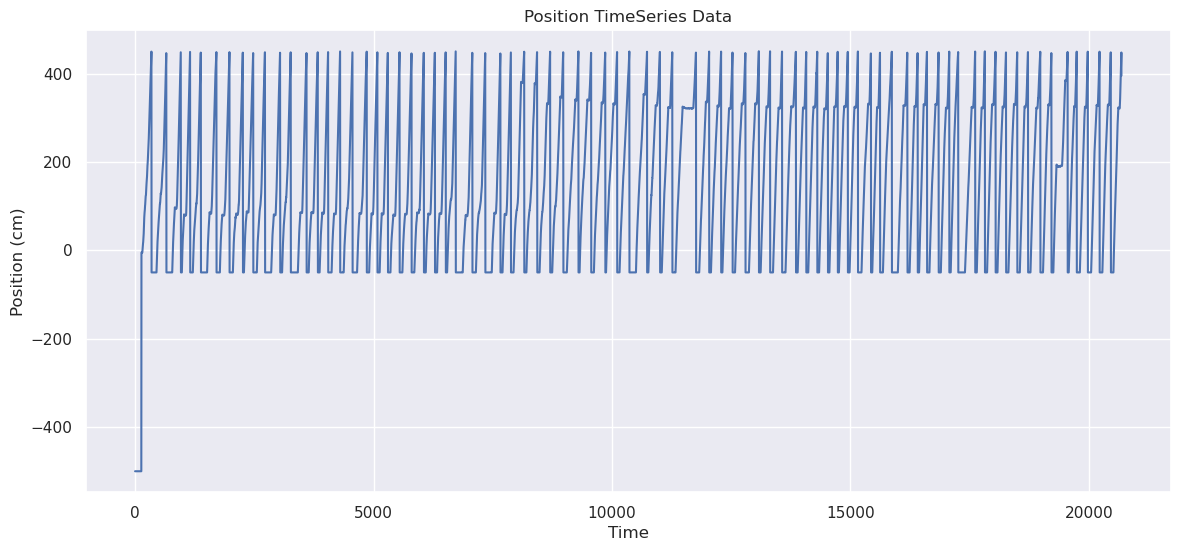

In [4]:
sns.set_theme()
position_data = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["position"].data[:]
plt.figure(figsize=(14, 6))
plt.plot(position_data)
plt.title('Position TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Position (cm)')
plt.show()

### Visualize Speed Data

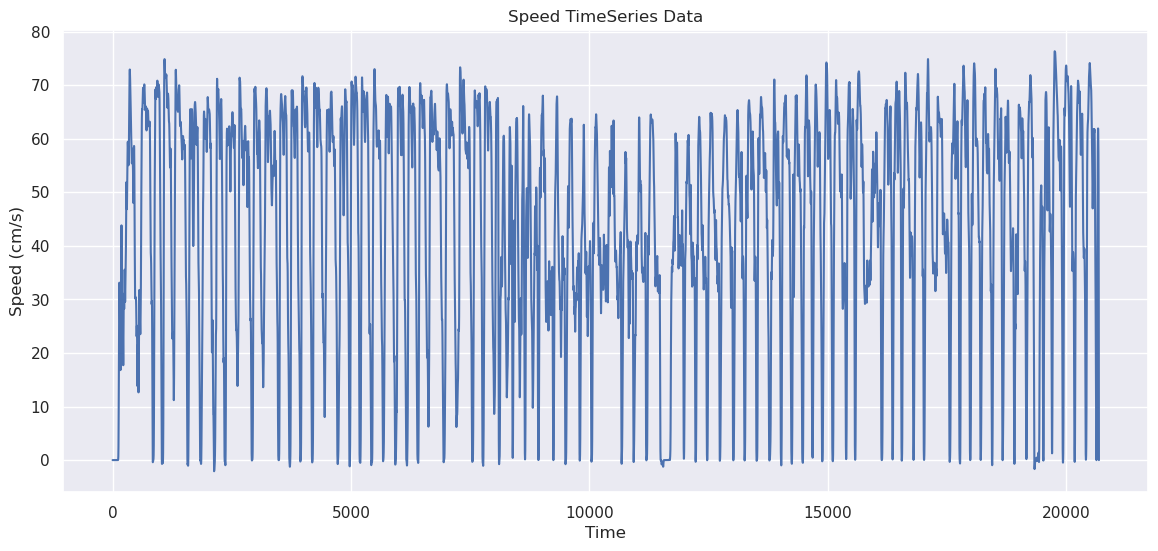

In [5]:
speed_data = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["speed"].data[:]
plt.figure(figsize=(14, 6))
plt.plot(speed_data)
plt.title('Speed TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Speed (cm/s)')
plt.show()

io.close()

## Summary and Future Directions
The notebook demonstrates how to load and visualize behavioral data from the Dandiset. Future analyses could involve exploring other time series data or combining datasets for more intricate visualizations.